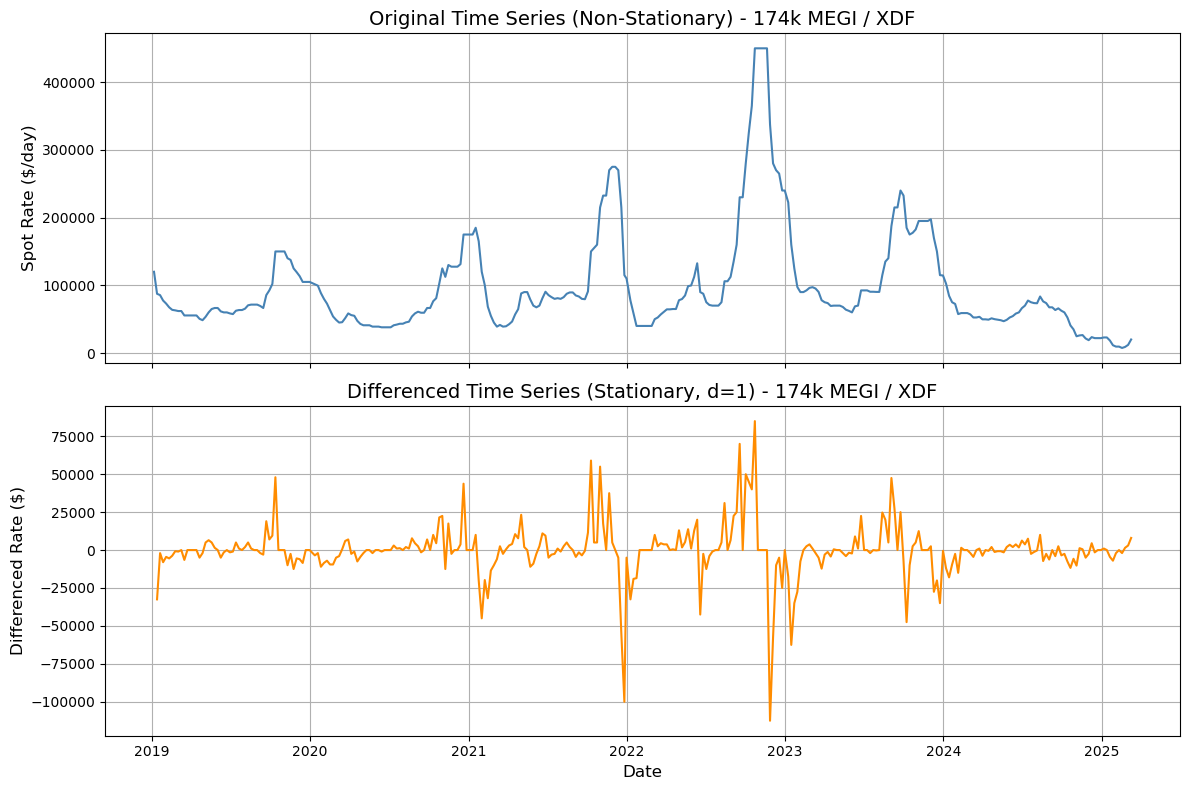

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('Spot charter rates - Fearnley LNG.xlsx')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the series for "174k MEGI / XDF"
series = df.set_index('Date')['174k MEGI / XDF'].dropna()

# Differencing (d=1) to achieve stationarity
series_diff = series.diff().dropna()

# Plot original vs differenced series
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Original series (Non-Stationary)
ax[0].plot(series, color='steelblue')
ax[0].set_title('Original Time Series (Non-Stationary) - 174k MEGI / XDF', fontsize=14)
ax[0].set_ylabel('Spot Rate ($/day)', fontsize=12)
ax[0].grid(True)

# Differenced series (Stationary)
ax[1].plot(series_diff, color='darkorange')
ax[1].set_title('Differenced Time Series (Stationary, d=1) - 174k MEGI / XDF', fontsize=14)
ax[1].set_ylabel('Differenced Rate ($)', fontsize=12)
ax[1].set_xlabel('Date', fontsize=12)
ax[1].grid(True)

plt.tight_layout()
plt.show()


C:\Users\Eier\AppData\Local\Temp\ipykernel_22536\3708293194.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)


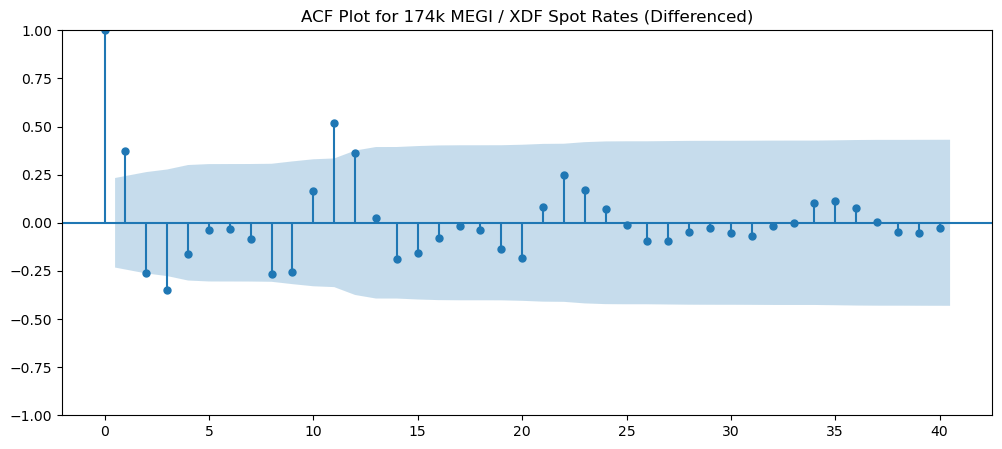

Max lags for PACF: 34


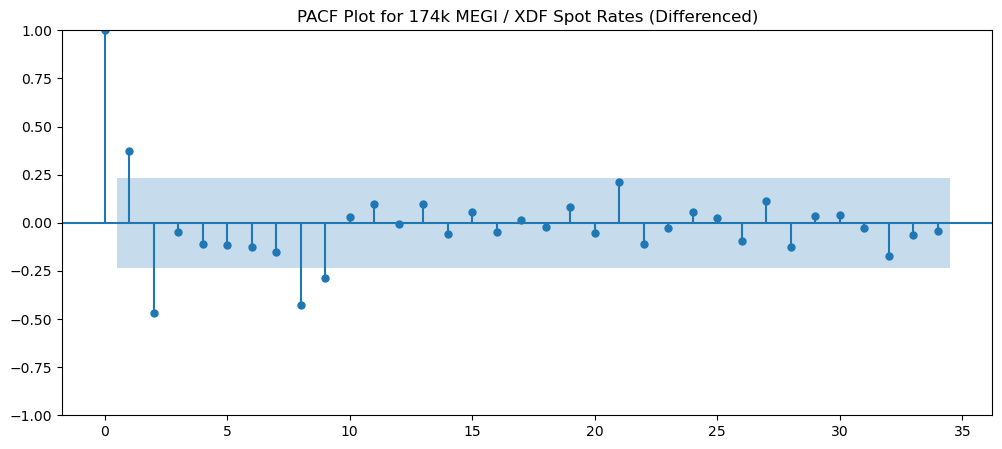

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)

series = df["LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)"]
diff_series = series.diff().dropna()

# ACF: you can use up to len(diff_series)-1 lags if you want
plt.figure(figsize=(12, 5))
plot_acf(diff_series, lags=40, ax=plt.gca())
plt.title('ACF Plot for 174k MEGI / XDF Spot Rates (Differenced)')
plt.show()

# PACF: only up to 50% of sample size allowed
max_pacf_lags = int(0.5 * len(diff_series)) - 1
print(f"Max lags for PACF: {max_pacf_lags}")

plt.figure(figsize=(12, 5))
plot_pacf(diff_series, lags=max_pacf_lags, ax=plt.gca(), method='ywm')
plt.title('PACF Plot for 174k MEGI / XDF Spot Rates (Differenced)')
plt.show()


C:\Users\Eier\AppData\Local\Temp\ipykernel_22536\79578933.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"])


    Lag  ACF Value
0     0   1.000000
1     1   0.755745
2     2   0.333291
3     3   0.036882
4     4  -0.088925
5     5  -0.134530
6     6  -0.163135
7     7  -0.177592
8     8  -0.154645
9     9  -0.005603
10   10   0.267026
11   11   0.461300
12   12   0.412405
13   13   0.203135
14   14  -0.009252
15   15  -0.134041
16   16  -0.176494
17   17  -0.197538
18   18  -0.219423
19   19  -0.224289
20   20  -0.166932
21   21  -0.022107
22   22   0.086149
23   23   0.077578
24   24  -0.007054
25   25  -0.101863
26   26  -0.159157
27   27  -0.169422
28   28  -0.177241
29   29  -0.182570
30   30  -0.179513
31   31  -0.145420
32   32  -0.081427
33   33  -0.013062
34   34   0.057383
35   35   0.075249
36   36   0.039984
37   37  -0.013592
38   38  -0.055389
39   39  -0.087902
40   40  -0.110516
\begin{tabular}{rr}
\toprule
Lag & ACF Value \\
\midrule
0 & 1.000 \\
1 & 0.756 \\
2 & 0.333 \\
3 & 0.037 \\
4 & -0.089 \\
5 & -0.135 \\
6 & -0.163 \\
7 & -0.178 \\
8 & -0.155 \\
9 & -0.006 \\
10 & 0.26

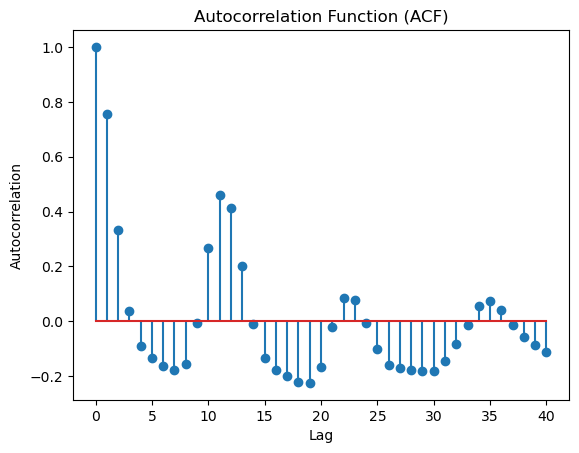

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Load your data
df = pd.read_csv("cleandata.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Use the correct column name below
series = df["LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)"]

# Compute ACF for all lags up to 40
acf_values = acf(series, nlags=40)

# Store in DataFrame
acf_table = pd.DataFrame({
    "Lag": range(len(acf_values)),
    "ACF Value": acf_values
})

# Print the full table
print(acf_table)

# Export to CSV for use in Excel or elsewhere
acf_table.to_csv("acf_values.csv", index=False)

# Print as a LaTeX table (copy-paste the output to your thesis)
print(acf_table.to_latex(index=False, float_format="%.3f"))

# (Optional) Plot ACF for visual check
plt.stem(acf_table["Lag"], acf_table["ACF Value"])
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF)")
plt.show()


C:\Users\Eier\AppData\Local\Temp\ipykernel_22536\3918755649.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)


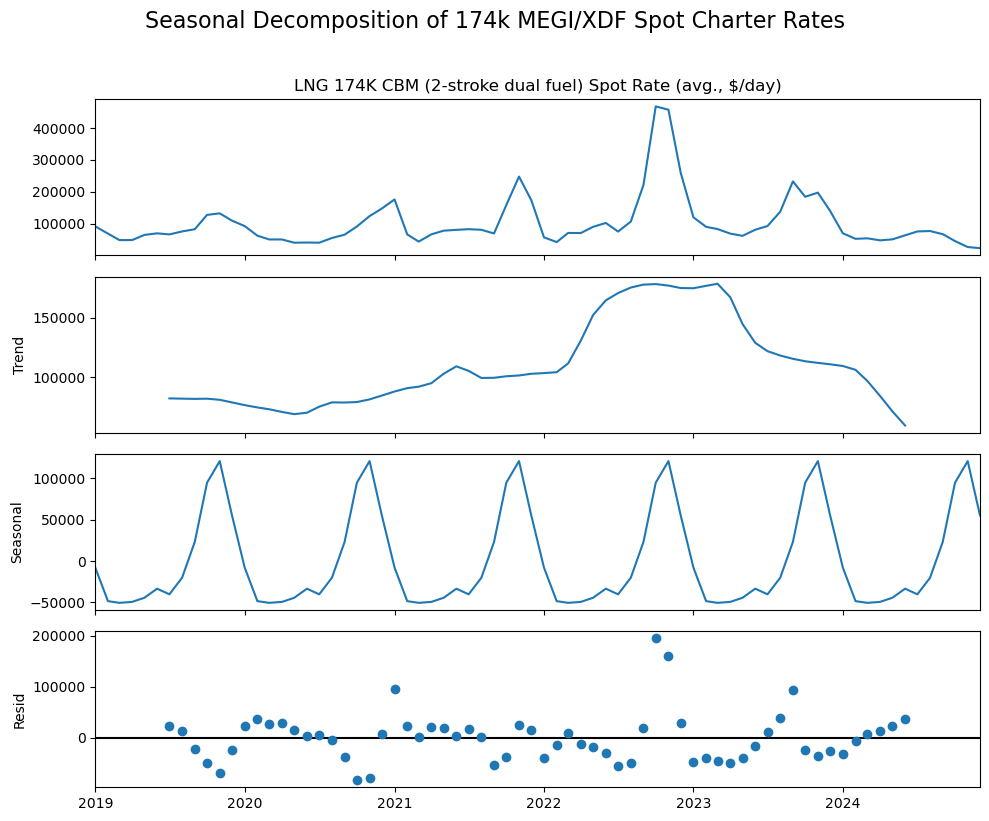

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your data
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)

# Use the relevant column
series = df["LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)"]

# (Optional but recommended) Drop NA values and ensure monthly frequency
series = series.asfreq('MS')  # 'MS' = Month Start; adjust if your data is different
series = series.dropna()

# Decompose (use period=12 for monthly data with annual seasonality)
decomposition = seasonal_decompose(series, model='additive', period=12)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Seasonal Decomposition of 174k MEGI/XDF Spot Charter Rates', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
